In [44]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression
from sklearn.preprocessing import StandardScaler

In [45]:
#Loading the data set
df = pd.read_csv('/Users/Sam/DSI/Projects/project-2-master/datasets/train.csv')
df_t = pd.read_csv('/Users/Sam/DSI/Projects/project-2-master/datasets/test.csv')

In [18]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [19]:
df_t.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [20]:
#checking for null values
df.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

In [21]:
df['Fireplace Qu']

0       NaN
1        TA
2       NaN
3       NaN
4       NaN
5        Gd
6       NaN
7       NaN
8       NaN
9        TA
10      NaN
11      NaN
12       TA
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18       TA
19      NaN
20       Po
21       Ex
22       Gd
23      NaN
24      NaN
25       TA
26       Gd
27       Gd
28      NaN
29       Po
       ... 
2021    NaN
2022     TA
2023     Gd
2024     TA
2025     Gd
2026     TA
2027    NaN
2028     Gd
2029     Gd
2030    NaN
2031     Fa
2032     Fa
2033     TA
2034    NaN
2035     Gd
2036     Gd
2037     Fa
2038    NaN
2039    NaN
2040     TA
2041     Gd
2042     Gd
2043     TA
2044    NaN
2045     Gd
2046     Gd
2047    NaN
2048     TA
2049     Gd
2050     TA
Name: Fireplace Qu, Length: 2051, dtype: object

In [7]:
#check for data types
df.dtypes

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [7]:
df.corr()['SalePrice']

Id                -0.051398
PID               -0.255052
MS SubClass       -0.087335
Lot Frontage       0.341842
Lot Area           0.296566
Overall Qual       0.800207
Overall Cond      -0.097019
Year Built         0.571849
Year Remod/Add     0.550370
Mas Vnr Area       0.512230
BsmtFin SF 1       0.423519
BsmtFin SF 2       0.016255
Bsmt Unf SF        0.190210
Total Bsmt SF      0.628925
1st Flr SF         0.618486
2nd Flr SF         0.248452
Low Qual Fin SF   -0.041594
Gr Liv Area        0.697038
Bsmt Full Bath     0.283662
Bsmt Half Bath    -0.045328
Full Bath          0.537969
Half Bath          0.283001
Bedroom AbvGr      0.137067
Kitchen AbvGr     -0.125444
TotRms AbvGrd      0.504014
Fireplaces         0.471093
Garage Yr Blt      0.533922
Garage Cars        0.648220
Garage Area        0.650270
Wood Deck SF       0.326490
Open Porch SF      0.333476
Enclosed Porch    -0.135656
3Ssn Porch         0.048732
Screen Porch       0.134581
Pool Area          0.023106
Misc Val          -0

In [22]:
df['Overall Qual']

0       6
1       7
2       5
3       5
4       6
5       6
6       6
7       5
8       5
9       5
10      6
11      7
12      5
13      8
14      7
15      5
16      5
17      5
18      6
19      7
20      5
21      8
22      8
23      6
24      5
25      6
26      5
27      5
28      5
29      5
       ..
2021    7
2022    6
2023    7
2024    7
2025    8
2026    7
2027    5
2028    7
2029    9
2030    4
2031    5
2032    6
2033    8
2034    6
2035    4
2036    8
2037    5
2038    6
2039    4
2040    7
2041    9
2042    4
2043    6
2044    6
2045    8
2046    8
2047    4
2048    6
2049    4
2050    7
Name: Overall Qual, Length: 2051, dtype: int64

In [55]:
df['SalePrice'].min()

12789

In [23]:
correlation = df.corr()['SalePrice']

In [24]:
df.corr()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Id,1.000000,0.175793,0.026543,-0.024967,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035493,...,-0.009045,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398
PID,0.175793,1.000000,-0.003632,-0.091291,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.247959,...,-0.041221,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052
MS SubClass,0.026543,-0.003632,1.000000,-0.389790,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.004047,...,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335
Lot Frontage,-0.024967,-0.091291,-0.389790,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,...,0.115180,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842
Lot Area,0.032872,0.024135,-0.245484,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,...,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
Overall Qual,-0.061483,-0.265863,0.035763,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,...,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
Overall Cond,-0.026096,0.106861,-0.070141,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,...,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
Year Built,-0.064444,-0.347039,0.035983,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,...,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
Year Remod/Add,-0.090040,-0.176666,0.044836,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,...,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
Mas Vnr Area,-0.035493,-0.247959,-0.004047,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,...,0.163584,0.163489,-0.107104,0.011161,0.086631,0.012422,0.079219,-0.001472,-0.018719,0.512230


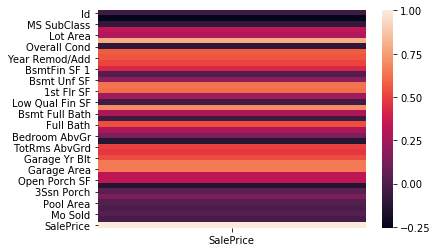

In [25]:
sns.heatmap(df.corr()[['SalePrice']])

(array([ 42., 525., 818., 350., 168.,  79.,  40.,  16.,   6.,   7.]),
 array([ 12789. ,  72675.8, 132562.6, 192449.4, 252336.2, 312223. ,
        372109.8, 431996.6, 491883.4, 551770.2, 611657. ]),
 <a list of 10 Patch objects>)

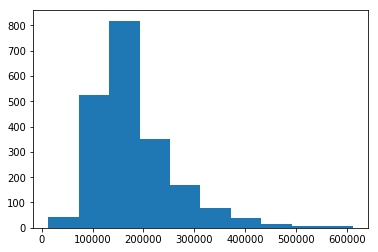

In [26]:
plt.hist(df['SalePrice'])

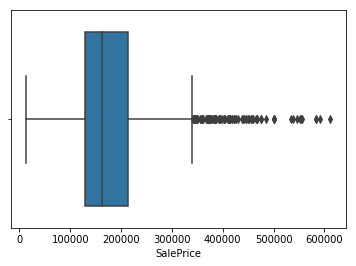

In [27]:
sns.boxplot(df.SalePrice)

In [28]:
df.dropna()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [36]:
df = df.fillna(0)

In [37]:
numerical_columns = df._get_numeric_data().columns
features = [col for col in numerical_columns if col != 'SalePrice']
X = df[features]
y = df['SalePrice']

In [30]:
X

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,...,475.0,0,44,0,0,0,0,0,3,2010
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,559.0,0,74,0,0,0,0,0,4,2009
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,246.0,0,52,0,0,0,0,0,1,2010
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,400.0,100,0,0,0,0,0,0,4,2010
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,484.0,0,59,0,0,0,0,0,3,2010
5,138,535126040,20,137.0,16492,6,6,1966,2002,0.0,...,578.0,0,0,0,0,0,0,0,6,2010
6,2827,908186070,180,35.0,3675,6,5,2005,2006,82.0,...,525.0,0,44,0,0,0,0,0,6,2006
7,145,535154050,20,NaN,12160,5,5,1959,1959,180.0,...,531.0,0,0,0,0,0,0,0,5,2010
8,1942,535353130,20,NaN,15783,5,5,1952,1952,0.0,...,420.0,0,324,0,0,0,0,400,6,2007
9,1956,535426130,60,70.0,11606,5,5,1969,1969,192.0,...,504.0,335,0,0,0,0,0,0,9,2007


In [31]:
y

0       130500
1       220000
2       109000
3       174000
4       138500
5       190000
6       140000
7       142000
8       112500
9       135000
10       85400
11      183600
12      131000
13      200000
14      193000
15      173500
16       98000
17      139000
18      143500
19      215200
20      129000
21      278000
22      344133
23      185000
24      145000
25      187500
26      138500
27      198000
28      119600
29      122900
         ...  
2021    195800
2022    223000
2023    192000
2024    197000
2025    298236
2026    238000
2027    119000
2028    262500
2029    425000
2030    102776
2031    149900
2032    190000
2033    162500
2034    217000
2035    137500
2036    270000
2037    142500
2038    161000
2039     93900
2040    225000
2041    412500
2042     83000
2043    128000
2044    182000
2045    394617
2046    298751
2047     82500
2048    177000
2049    144000
2050    189000
Name: SalePrice, Length: 2051, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

/Users/Sam/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Sam/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Sam/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [34]:
lr = LinearRegression()
lasso = LassoCV()
ridge = RidgeCV()

In [38]:
cross_val_score(lr, X, y, cv=3)

array([0.82697502, 0.77730936, 0.81076484])

In [21]:
cross_val_score(lasso, X,y, cv=3)

/Users/Sam/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Sam/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Sam/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.08472528, 0.02204235, 0.07250645])

In [39]:
cross_val_score(ridge, X, y, cv=3).mean()

-39134.60202544589

In [51]:
df.fillna(0)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,6,2006,New,140000
7,145,535154050,20,RL,0.0,12160,Pave,0,IR1,Lvl,...,0,0,0,MnPrv,0,0,5,2010,COD,142000
8,1942,535353130,20,RL,0.0,15783,Pave,0,Reg,Lvl,...,0,0,0,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,0,IR1,HLS,...,0,0,0,0,0,0,9,2007,WD,135000
